In [327]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
from matplotlib.font_manager import FontProperties 
import datetime
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib import dates as mdates

In [328]:
def get_data(file):
    #改变字段'日期'类型
    file.loc[:,'反映日期'] = pd.to_datetime(file['反映日期'].values).strftime('%Y-%m')
    data = pd.DataFrame({'日期':file['反映日期'].values,
                       '地址':file['地址'].values})
    result = pd.DataFrame()
    for d in data['日期'].drop_duplicates():
        res = data[data['日期'] == d]['地址'].value_counts()
        res = pd.DataFrame({'地址':res.index,
                    'value':res.values})
        result = result.append(pd.merge(data[data['日期'] == d],res).drop_duplicates(),ignore_index=True)
    return result

In [329]:
file = pd.read_csv('/home/jakey/文档/jakey/result.csv')
file = file[pd.notna(file['地址'])].reset_index(drop=True)

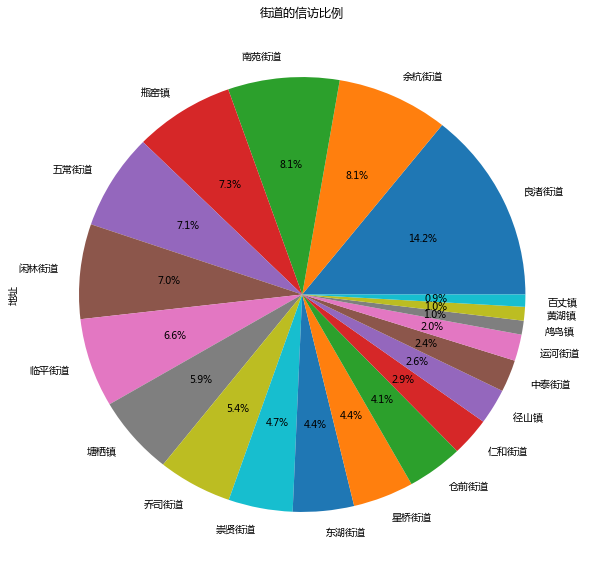

In [330]:
# matplotlib.use('qt4agg')
# #指定默认字体
# matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
# matplotlib.rcParams['font.family']='sans-serif'
# #解决负号'-'显示为方块的问题
# matplotlib.rcParams['axes.unicode_minus'] = False 
plt.title('街道的信访比例')
file['地址'].value_counts().plot(kind='pie',autopct='%0.1f%%',figsize=(10,10))

In [331]:
result = get_data(file)

In [332]:
result

,日期,地址,value
0,2013-04,运河街道,28
1,2013-04,中泰街道,21
2,2013-04,临平街道,22
3,2013-04,瓶窑镇,127
4,2013-04,五常街道,80
5,2013-04,良渚街道,122
6,2013-04,塘栖镇,119
7,2013-04,南苑街道,60
8,2013-04,崇贤街道,57
9,2013-04,余杭街道,110


In [333]:
# fig = plt.figure(figsize = (10,10))
# ax = Axes3D(fig)
# i=0
# for date in result[0]['日期'].drop_duplicates():
#     x = np.arange(20)
#     y = result[0][result[0]['日期']=='2013-01']['value']
#     ax.bar(x, y, zs = i, zdir='y', alpha=0.8)  
#     i = i + 100

In [334]:
mser = pd.Series(result['value'].values,
                index = [result['日期'].values,
                         result['地址'].values])

In [335]:
mser

2013-04  运河街道      28
         中泰街道      21
         临平街道      22
         瓶窑镇      127
         五常街道      80
         良渚街道     122
         塘栖镇      119
         南苑街道      60
         崇贤街道      57
         余杭街道     110
         闲林街道      96
         乔司街道     106
         星桥街道      40
         径山镇       34
         仓前街道      31
         东湖街道      15
         黄湖镇       16
         仁和街道      53
         鸬鸟镇       17
         百丈镇       17
2013-03  良渚街道     126
         塘栖镇       97
         余杭街道      93
         闲林街道      61
         瓶窑镇       91
         乔司街道      59
         运河街道      26
         仓前街道      30
         五常街道      62
         径山镇       31
                 ... 
2018-06  五常街道     241
         东湖街道     211
         乔司街道     191
         仓前街道     115
         仁和街道      53
         塘栖镇      112
         中泰街道      49
         百丈镇       20
         径山镇       41
         黄湖镇        9
2018-05  瓶窑镇      433
         临平街道     544
         南苑街道     671
         闲林街道     518
         良

In [336]:
mser = mser.unstack()

In [337]:
mser

,东湖街道,中泰街道,临平街道,乔司街道,五常街道,仁和街道,仓前街道,余杭街道,南苑街道,塘栖镇,崇贤街道,径山镇,星桥街道,瓶窑镇,百丈镇,良渚街道,运河街道,闲林街道,鸬鸟镇,黄湖镇
2013-01,18,30,22,68,32,47,30,97,59,74,43,51,21,91,24,119,15,53,11,16
2013-02,11,7,5,23,28,21,18,43,30,59,17,33,10,48,20,57,10,31,13,6
2013-03,13,25,17,59,62,38,30,93,44,97,35,31,22,91,19,126,26,61,28,38
2013-04,15,21,22,106,80,53,31,110,60,119,57,34,40,127,17,122,28,96,17,16
2013-05,19,44,10,77,78,45,26,91,65,93,45,46,38,107,18,128,33,78,19,31
2013-06,28,20,15,97,33,37,27,97,81,88,37,39,44,115,16,119,28,67,23,28
2013-07,28,41,21,84,89,41,35,141,106,95,77,46,45,178,33,171,72,112,42,27
2013-08,34,28,31,93,63,38,29,111,70,106,36,64,50,156,43,187,46,84,27,30
2013-09,29,16,22,63,72,36,40,106,91,89,57,49,39,100,33,158,28,85,21,31
2013-10,23,28,33,66,70,36,32,99,108,111,60,57,44,117,29,165,26,101,20,32


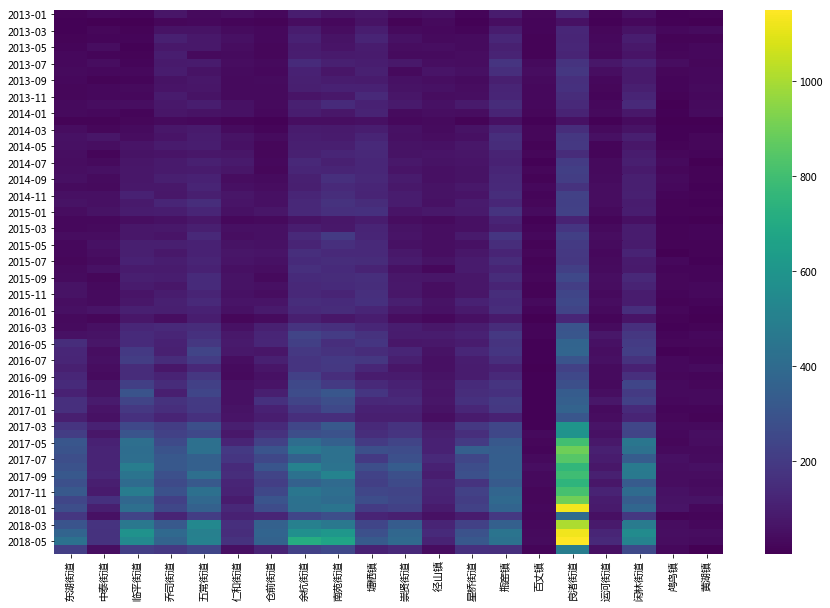

In [338]:
# fig = plt.figure(figsize = (10,10))
# ax = Axes3D(fig)
plt.figure(figsize=(15,10))
sns.heatmap(mser,fmt="g", cmap='viridis')

In [339]:
result

,日期,地址,value
0,2013-04,运河街道,28
1,2013-04,中泰街道,21
2,2013-04,临平街道,22
3,2013-04,瓶窑镇,127
4,2013-04,五常街道,80
5,2013-04,良渚街道,122
6,2013-04,塘栖镇,119
7,2013-04,南苑街道,60
8,2013-04,崇贤街道,57
9,2013-04,余杭街道,110


In [340]:
result.loc[:,'日期'] = pd.to_datetime(result['日期'].values).strftime('%m')

In [341]:
ggroup = result['value'].groupby([result['日期'],result['地址']])

In [342]:
res = ggroup.sum()

In [343]:
res = res.unstack()

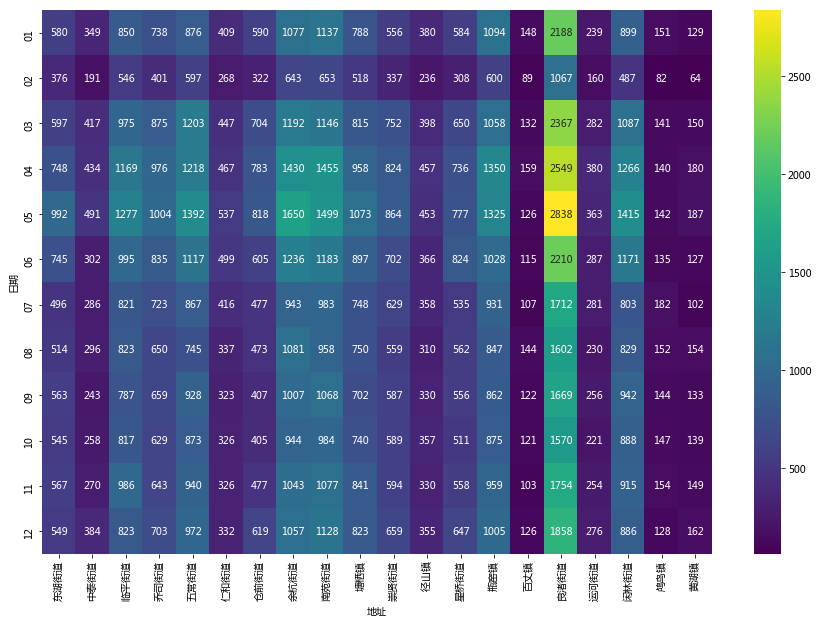

In [344]:
plt.figure(figsize=(15,10))
sns.heatmap(res,annot=True,fmt="g", cmap='viridis')

In [ ]:
mser.drop(['东湖街道','运河街道','星桥街道','临平街道','鸬鸟镇','黄湖镇'],axis = 1,inplace=True)

([<matplotlib.axis.XTick at 0x7efebf2311d0>,
 <a list of 66 Text xticklabel objects>)

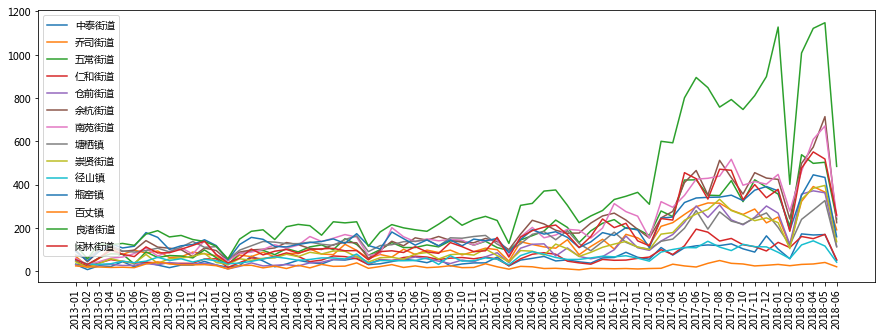

In [412]:
fig1 = plt.figure(figsize=(15,5))
# months = mdates.MonthLocator()
# days = mdates.DayLocator()
# timeFmt = mdates.DateFormatter('%Y-%m-%d')
x = mser.index
plt.plot(x,mser)
plt.legend(mser,loc=2)
plt.xticks(mser.index,rotation=90)
# # ax.xaxis.set_major_locator(months)
# ax.xaxis.set_major_formatter(timeFmt)
# ax.xaxis.set_minor_locator(days)